In [11]:
#Bütikofer Kevin, Charles-Lewis Jaggi

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
import os

In [3]:
# This is a method to read the MNIST dataset from a ROOT directory
def load_MNIST(ROOT):
  '''load all of mnist
  training set first'''

  Xtr = []
  train = pd.read_csv(os.path.join(ROOT, 'mnist_train.csv'))
  X = np.array(train.drop('label', axis=1))
  Ytr = np.array(train['label'])
  # With this for-loop we give the data a shape of the acctual image (28x28)
  # instead of the shape in file (1x784)
  for row in X:
      Xtr.append(row.reshape(28,28))
  # load test set second
  Xte = []
  test = pd.read_csv(os.path.join(ROOT, 'mnist_test.csv'))
  X = np.array(test.drop('label', axis=1))
  Yte = np.array(test['label'])
  # same reshaping
  for row in X:
      Xte.append(row.reshape(28,28))
  
  return np.array(Xtr), np.array(Ytr), np.array(Xte), np.array(Yte)


In [4]:
# Load the raw MNIST data.
mnist_dir = r'C:\Dev\Master\MachineLearning\ML_homework\07\mnist'   # TODO: update this dir information to your own dir
X_train, y_train, X_test, y_test = load_MNIST(mnist_dir)

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)

N_test_per_class = 30
N_train_per_class = 60

X_train2 = []
y_train2 = []
X_test2 = []
y_test2 = []

for y, cls in enumerate(classes): # y and cls takes values from 0-9
    idxs = np.flatnonzero(y_train == y) # gets the indices of samples that corresponds to class y
    idxs = np.random.choice(idxs, N_train_per_class, replace=False) # picks randomly samples_per_class indices
    for i, idx in enumerate(idxs):
        X_train2.append(X_train[idx].flatten())
        y_train2.append(y_train[idx])
        
    idxs = np.flatnonzero(y_test == y) # gets the indices of samples that corresponds to class y
    idxs = np.random.choice(idxs, N_test_per_class, replace=False) # picks randomly samples_per_class indices
    for i, idx in enumerate(idxs):
        X_test2.append(X_test[idx].flatten())
        y_test2.append(y_test[idx])



# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window. Also setting some parameters for display.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

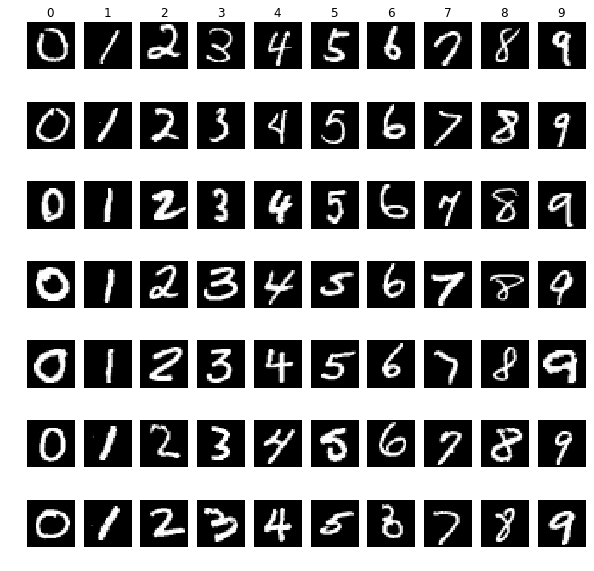

In [5]:
# Now let's visualise some of the images

samples_per_class = 7
for y, cls in enumerate(classes): # y and cls takes values from 0-9
    idxs = np.flatnonzero(y_train == y) # gets the indices of samples that corresponds to class y
    idxs = np.random.choice(idxs, samples_per_class, replace=False) # picks randomly samples_per_class indices
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1   # determines the sub-plot index
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [6]:
X_train, y_train, X_test, y_test = np.array(X_train2)*1.0/255, np.array(y_train2), np.array(X_test2)*1.0/255, np.array(y_test2)


print(X_train.shape)

(600, 784)


In [23]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly'], 'degree': [2,3], 'coef0': [0.0, 1.0]}
 ]

svc = svm.SVC()

In [ ]:
for params in param_grid:    
    clf = GridSearchCV(svc, params, cv=10, n_jobs=-1)

    print("Begin fitting")
    clf.fit(X_train, y_train) 
    print("End fitting")  
    y_predict = clf.predict(X_test)
    # scores = cross_val_score(clf, X_test, y_test, cv=10)
    #print(clf.best_params_)
    # print(scores)
    print(clf, classification_report(y_test, y_predict))

    print(confusion_matrix(y_test, y_predict))

Begin fitting
End fitting
GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)               precision    recall  f1-score   support

           0       0.90      0.93      0.92        30
           1       0.88      1.00      0.94        30
           2       0.86      0.83      0.85        30
           3       0.74      0.87      0.80        30
           4       0.87      0.90      0.89        30
           5       0.90      0.87      0.88        30
           6       0.93      0.90      0.92        30
           7     